# Finding the best fitting distribution for data

## The approach is to apply each of scipy's distribution functions to the input data and selecting the one with the smallest sum of squared errors.

In [1]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import datarobot as dr
import stress_test
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
# Get the dataset and the feature
data_path = 'data/'
df = pd.read_csv(data_path + '10K_Lending_Club_Loans.csv', encoding = "ISO-8859-1")
feature = 'annual_inc'
data = df[feature].dropna()

## stress_test.best_fit_distribution:
### Applies the scipy distributions and returns the name of the best one along with its parameters, which is then instantiated.  This function also takes an optional axes parameter for visualizaiton to plot each distribution fit on a histogram of the data.

- Time: 'best_fit_distribution' 95.45


Text(0,0.5,'Frequency')

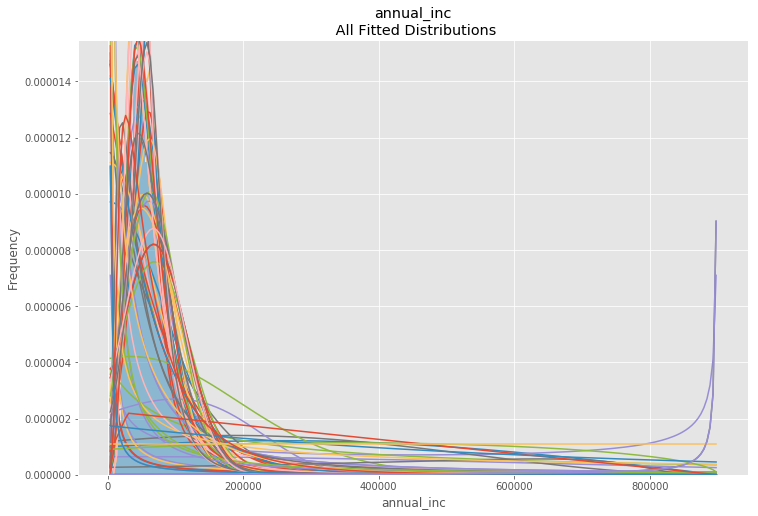

In [3]:
# Plot feature values as histogram for comparison against pool of distributions to try
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution (plots each distribution to the axes param along the way)
best_fit_name, best_fit_paramms = stress_test.best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plot annotations
ax.set_ylim(dataYLim)
ax.set_title('%s\n All Fitted Distributions' % feature)
ax.set_xlabel(feature)
ax.set_ylabel('Frequency')

## stress_test.make_pdf:
### Uses the distribution object and parameters to generate a pdf, which is then normalized and displayed over the data histgram.

Text(0,0.5,'Frequency')

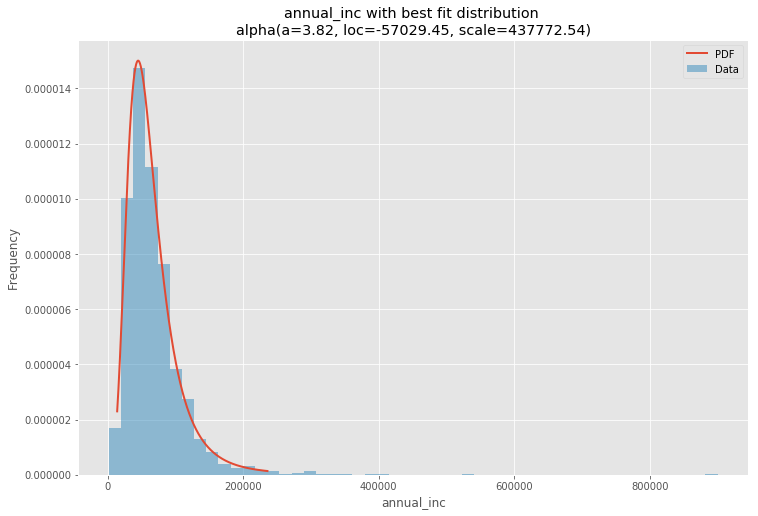

In [4]:
# Make pdf from the best distribution
pdf = stress_test.make_pdf(best_dist, best_fit_paramms, normalize=True)
pdf_raw = stress_test.make_pdf(best_dist, best_fit_paramms, normalize=False)  # for display

# Display feature histogram and pdf of best distribution
plt.figure(figsize=(12,8))
ax = pdf_raw.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title('%s with best fit distribution \n%s' % (feature, dist_str))
ax.set_xlabel(feature)
ax.set_ylabel('Frequency')

## Stress testing
### Draws random samples from the left and right tails below a given threshold.  The threshold is a relative percentage of the max value in the distribution (eg, the peak of a histogram).  This is similar to low probability in the pdf without a specific p value, and which is equated to be an 'extreme' value for this purpose.

In [5]:
# Sample extreme values from the pdf
samples = stress_test.sample_low_proba_from_pdf(pdf, prob_thresh=0.1)
print('samples:', samples)

samples: [161882.34101195403]


# -----------------------------------------------------------------------------------------
### Run on a subsample of the lending club data on all numeric features to get an understanding of how this works across various distributions.

In [6]:
df = df.sample(500)

dr.Client(config_path='/Users/matthew.cohen/.config/datarobot/drconfig.yaml')
PROJECT_ID = '5ac44503c92d810016538e5e'
MODEL_ID = '5ac448e3adb29ab27bc60168'

# Get the top n features for the model
top_features = stress_test.get_top_n_features(PROJECT_ID, MODEL_ID, 10)
print('top features:\n',top_features); print()
print(df[top_features].info())

Model type: AVG Blender
Requesting feture impact for model 5ac448e3adb29ab27bc60168
Feature impact compute done.
- Time: 'get_top_n_features' 3.89
top features:
 ['desc', 'annual_inc', 'int_rate', 'title', 'inq_last_6mths', 'term', 'revol_util', 'open_acc', 'grade', 'dti']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 5137 to 4581
Data columns (total 10 columns):
desc              328 non-null object
annual_inc        499 non-null float64
int_rate          500 non-null object
title             500 non-null object
inq_last_6mths    499 non-null float64
term              500 non-null object
revol_util        498 non-null float64
open_acc          499 non-null float64
grade             500 non-null object
dti               500 non-null float64
dtypes: float64(5), object(5)
memory usage: 43.0+ KB
None


### Rather than run on the top n features, run on all non-object (numeric) features

In [7]:
# Get the columns with numeric data types
# g = df[top_features].columns.to_series().groupby(df.dtypes).groups
g = df.columns.to_series().groupby(df.dtypes).groups
cols_list = [v.values for k, v in g.items() if str(k) != "object"]
numeric_cols = np.concatenate(cols_list).ravel()
print(numeric_cols)

['loan_amnt' 'funded_amnt' 'revol_bal' 'policy_code' 'is_bad'
 'installment' 'annual_inc' 'dti' 'delinq_2yrs' 'inq_last_6mths'
 'mths_since_last_delinq' 'mths_since_last_record' 'open_acc' 'pub_rec'
 'revol_util' 'total_acc' 'mths_since_last_major_derog']


Processing column loan_amnt
- Time: 'best_fit_distribution' 13.86
- Best fit dist: johnsonsu
- samples: [41300.633807108374]


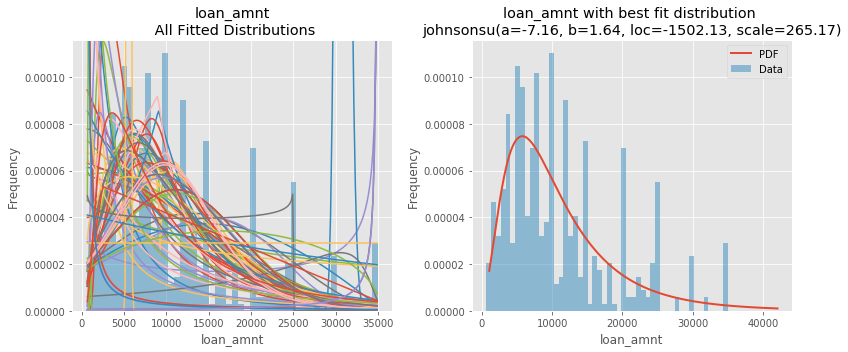

Processing column funded_amnt
- Time: 'best_fit_distribution' 14.61
- Best fit dist: betaprime
- samples: [36431.71975786942]


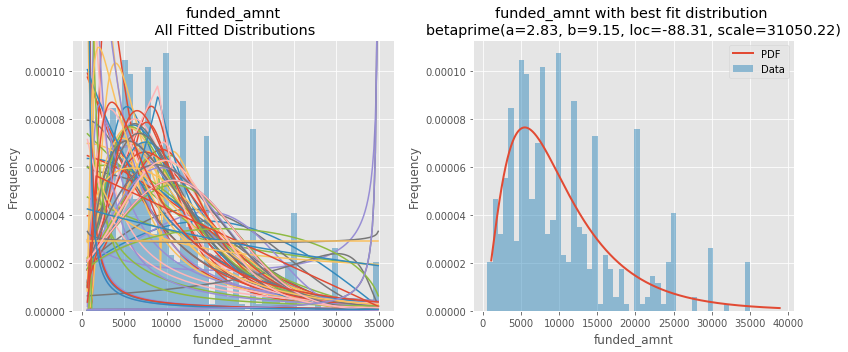

Processing column revol_bal
- Time: 'best_fit_distribution' 13.84
- Best fit dist: exponnorm
- samples: [53464.88099950026]


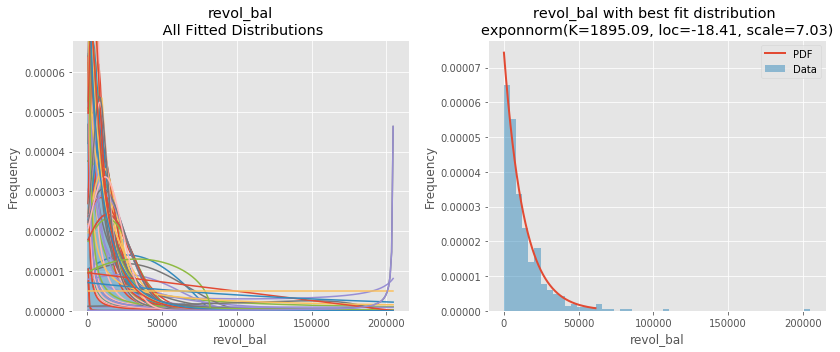

Processing column policy_code
- Time: 'best_fit_distribution' 20.71
- Best fit dist: betaprime
- samples: [1.0077717710822391]


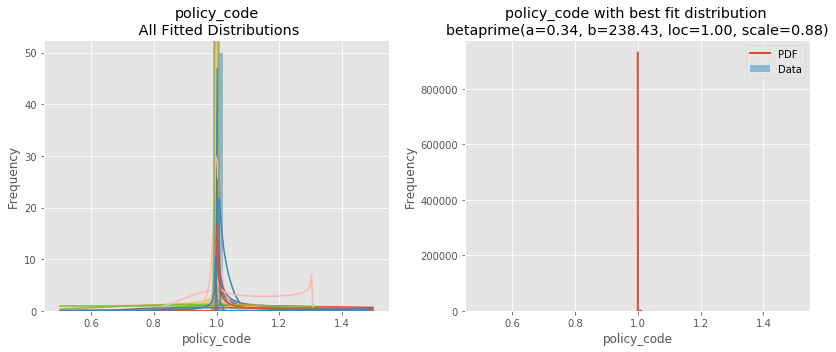

Processing column is_bad
- Time: 'best_fit_distribution' 12.53
- Best fit dist: vonmises
- samples: [-0.013556126200112928, 0.01364054963733369]


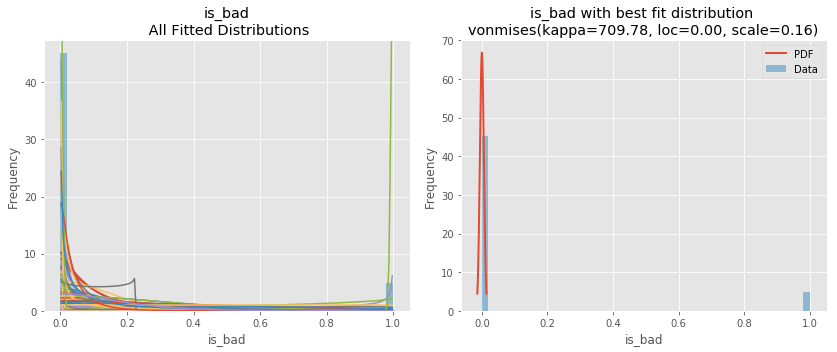

Processing column installment
- Time: 'best_fit_distribution' 14.73
- Best fit dist: ncf
- samples: [1047.6270372233876]


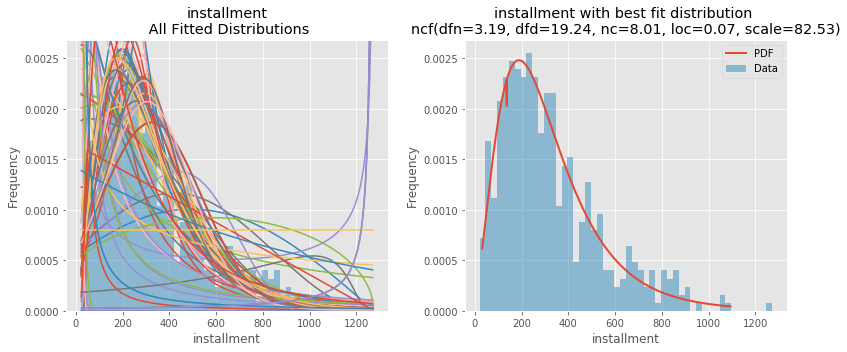

Processing column annual_inc
- Time: 'best_fit_distribution' 13.10
- Best fit dist: johnsonsu
- samples: [192766.32407334892]


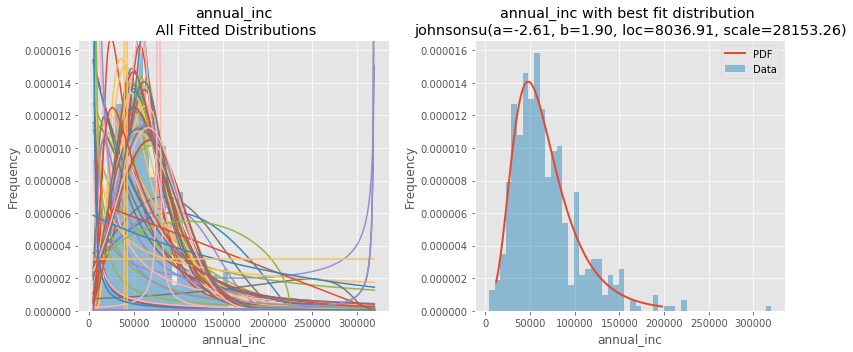

Processing column dti
- Time: 'best_fit_distribution' 13.87
- Best fit dist: gennorm
- samples: [0.44647546825513956, 26.45350353766321]


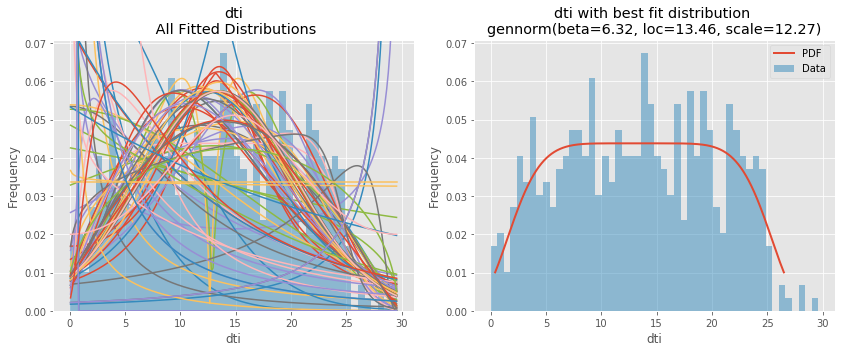

Processing column delinq_2yrs
- Time: 'best_fit_distribution' 13.16
- Best fit dist: halfgennorm
- samples: [0.02467197953524658]


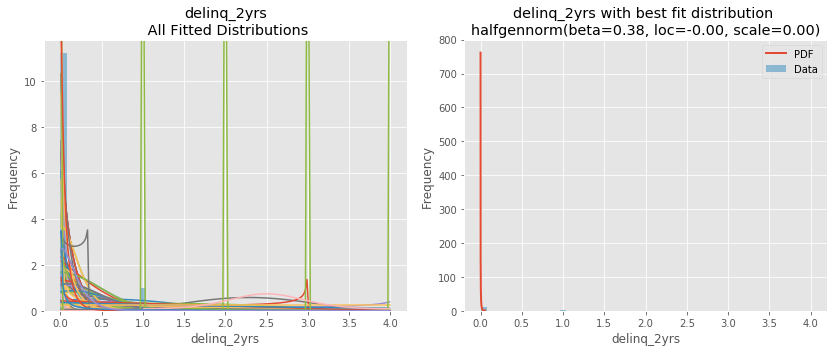

Processing column inq_last_6mths
- Time: 'best_fit_distribution' 14.14
- Best fit dist: alpha
- samples: [1.842395842733933]


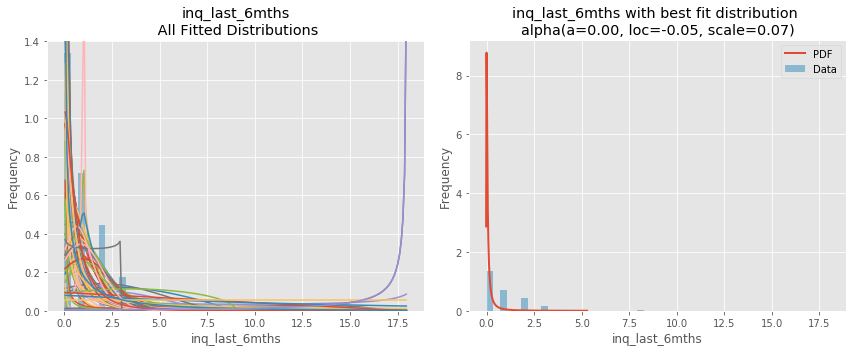

Processing column mths_since_last_delinq
- Time: 'best_fit_distribution' 11.55
- Best fit dist: ncx2
- samples: [138.5281846917518]


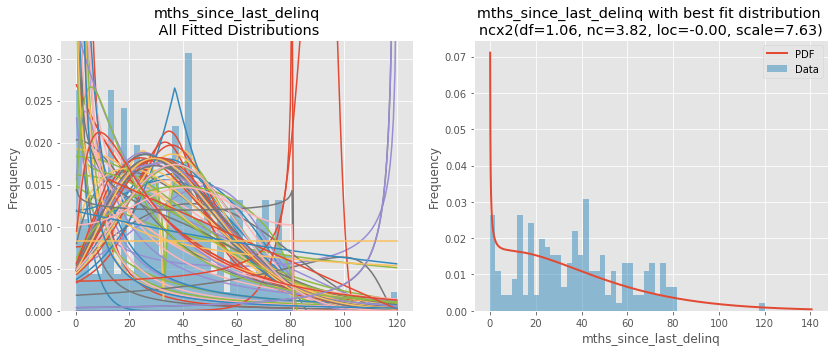

Processing column mths_since_last_record
- Time: 'best_fit_distribution' 10.97
- Best fit dist: lomax
- samples: [1367992395.0239053]


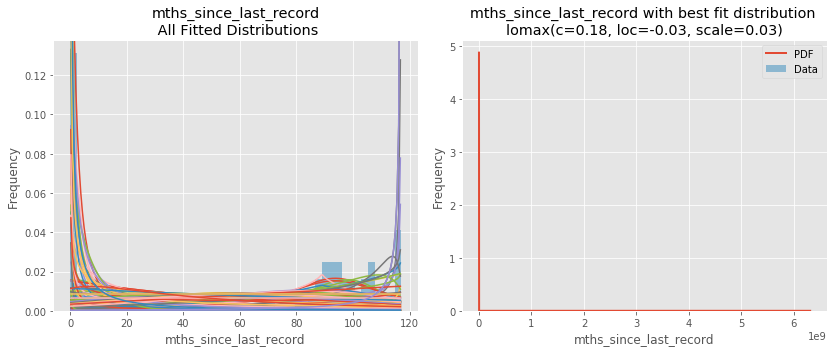

Processing column open_acc
- Time: 'best_fit_distribution' 13.16
- Best fit dist: kstwobign
- samples: [22.48525941317224]


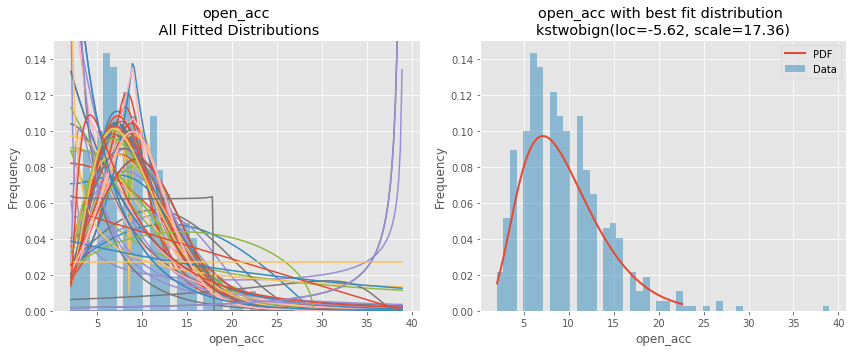

Processing column pub_rec
- Time: 'best_fit_distribution' 12.23
- Best fit dist: betaprime
- samples: [0.1107676178933415]


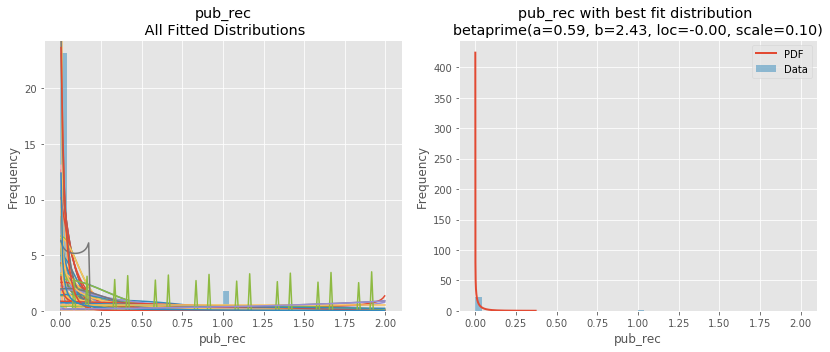

Processing column revol_util
- Time: 'best_fit_distribution' 14.69
- Best fit dist: gausshyper
- samples: [97.5755358650237]


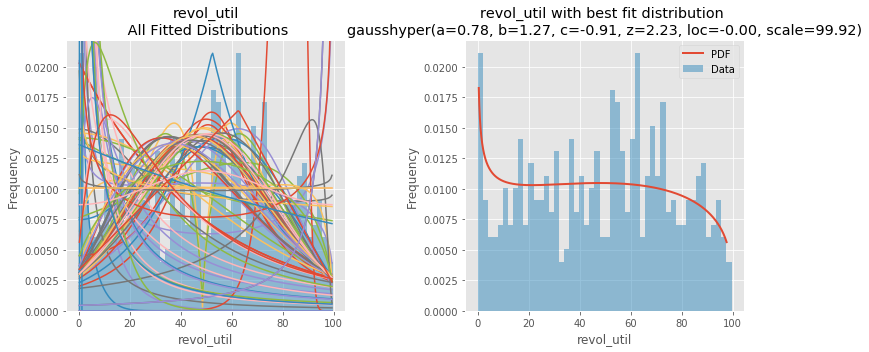

Processing column total_acc
- Time: 'best_fit_distribution' 14.58
- Best fit dist: burr
- samples: [55.55285283165538]


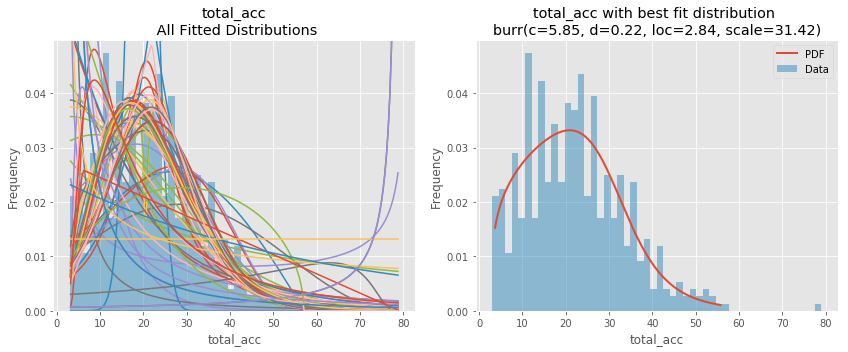

Processing column mths_since_last_major_derog


In [8]:
for feature in numeric_cols:
    print('Processing column %s' % feature)
    data = df[feature].dropna()
    if data.shape[0] == 0:
        continue  # this feature has only nan's
    
    # Plot feature values as histogram for comparison against pool of distributions to try
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    ax1, ax2 = axs.flatten()
    
    ax1 = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1], ax=ax1)
    # Save plot limits
    dataYLim = ax1.get_ylim()

    # Find best fit distribution (plots each distribution to the axes param along the way)
    best_fit_name, best_fit_paramms = stress_test.best_fit_distribution(data, 200, ax1)
    best_dist = getattr(st, best_fit_name)
    print('- Best fit dist:', best_fit_name)

    # Update plot annotations
    ax1.set_ylim(dataYLim)
    ax1.set_title('%s\n All Fitted Distributions' % feature)
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Frequency')

    # Make pdf from the best distribution
    pdf = stress_test.make_pdf(best_dist, best_fit_paramms, normalize=True)
    pdf_raw = stress_test.make_pdf(best_dist, best_fit_paramms, normalize=False)  # for display

    # Display feature histogram and pdf of best distribution
    #plt.figure(figsize=(12,8))
    ax2 = pdf_raw.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax2)

    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_paramms)])
    dist_str = '{}({})'.format(best_fit_name, param_str)

    ax2.set_title('%s with best fit distribution \n%s' % (feature, dist_str))
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Frequency')

    # Sample extreme values from the pdf
    samples = stress_test.sample_low_proba_from_pdf(pdf, prob_thresh=0.01)
    print('- samples:', samples)
        
    fig.tight_layout()
    plt.show()